In [1]:
# initialise
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# HDB Resale Flat Prices

Data for this analysis was obtained from [here](https://data.gov.sg/dataset/resale-flat-prices).

The data set consists of transacted resale flat prices from the years 1990 to present (8 December 2022).

According to the data.gov website, prior to March 2012, data is based on date of approval for the resale transactions. For March 2012 onwards, the data is based on date of registration for the resale transactions.

Furthermore, data from 2015 onwards includes a column named `remaining_lease`, which indicates the remaining years of lease for the houses in the datasets.

For ease of analyses, I will limit my analyses to the years from 2015, which would already include at least 7 years of data and encompass several global and local events impacting the HDB resale market.

In [2]:
# import dataset

f1 = '/Users/iylia/Library/Mobile Documents/com~apple~CloudDocs/SP/Intro to Programming for DS/CA1/Data/Resale Flat Prices/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
f2 = '/Users/iylia/Library/Mobile Documents/com~apple~CloudDocs/SP/Intro to Programming for DS/CA1/Data/Resale Flat Prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'

d1 = np.loadtxt(f1,
                delimiter=',',
                skiprows=1,
                usecols=(0,1,2,5,6,8,9,10),
                dtype=[('month', 'U50'),
                        ('town', 'U50'),
                        ('flat_type', 'U50'),
                        ('storey_range', 'U50'),
                        ('floor_area_sqm', 'f8'),
                        ('lease_commence_date', 'i8'),
                        ('remaining_lease', 'i8'),
                        ('resale_price', 'f8')],
               )

d2 = np.loadtxt(f2,
                delimiter=',',
                skiprows=1,
                usecols=(0,1,2,5,6,8,9,10),
                dtype=[('month', 'U50'),
                        ('town', 'U50'),
                        ('flat_type', 'U50'),
                        ('storey_range', 'U50'),
                        ('floor_area_sqm', 'f8'),
                        ('lease_commence_date', 'i8'),
                        ('remaining_lease', 'U50'),
                        ('resale_price', 'f8')],
               )

# change remaining_lease column in d2 to be integer of years without months
years = [i for i,j in np.char.split(d2['remaining_lease'],sep=' years')] # create list of years from split array string where i is the year, j is the rest of the string

d2['remaining_lease'] = np.array(years) # replace the remaining lease column in d2 to be integer of years without months

d2 = np.sort(d2, order='month')

# stack d1 and d2 into combined dataset
d = np.hstack((d1,d2))

# convert storey_range into categorical levels of low/mid/high
storeys = []
for i in d['storey_range']:
    if i in ("01 TO 03", "01 TO 05", "04 TO 06"):
        storeys.append("low")
    elif i in ("06 TO 10", "07 TO 09"):
        storeys.append("mid")
    else:
        storeys.append("high")

d['storey_range'] = np.array(storeys, dtype='U50')

# convert month column to MMM YYYY
months_list = [dt.strptime(date, '%Y-%m').date().strftime('%b %Y') for date in d['month']]
d['month'] = months_list

# simple text analysis
print('{:*^24}'.format('Resale Flat Prices'))
print()
print(f'There are {len(d)} rows and 8 columns in this dataset')
print()
# view first 10 rows of full dataset
print('View the first 10 rows of the full dataset')
print()
print(d[:10])
print()
print(f'The names of the columns are:')
print(f'- month <class {d.dtype[0]}> isnumeric: {np.unique(np.char.isnumeric(d["month"]))}')
print(f'- town <class {d.dtype[1]}> isnumeric: {np.unique(np.char.isnumeric(d["town"]))}')
print(f'- flat_type <class {d.dtype[2]}> isnumeric: {np.unique(np.char.isnumeric(d["flat_type"]))}')
print(f'- storey_range <class {d.dtype[3]}> isnumeric: {np.unique(np.char.isnumeric(d["storey_range"]))}')
print(f'- floor_area_sqm <class {d.dtype[4]}>')
print(f'- lease_commence_date <class {d.dtype[5]}>')
print(f'- remaining_lease <class {d.dtype[6]}> isnumeric: {np.unique(np.char.isnumeric(d["remaining_lease"]))}')
print(f'- resale_price <class {d.dtype[7]}>')
print()
print(f'{len(np.unique(d["month"]))} unique values in month column')
print(f'{len(np.unique(d["town"]))} unique values in town column')
print(f'{len(np.unique(d["flat_type"]))} unique values in flat_type column')
print(f'{len(np.unique(d["storey_range"]))} unique values in storey_range column')
print(f'{len(np.unique(d["floor_area_sqm"]))} unique values in floor_area_sqm column')
print(f'{len(np.unique(d["lease_commence_date"]))} unique values in lease_commence_date column')
print(f'{len(np.unique(d["remaining_lease"]))} unique values in remaining_lease column')
print(f'{len(np.unique(d["resale_price"]))} unique values in resale_price column')

***Resale Flat Prices***

There are 178825 rows and 8 columns in this dataset

View the first 10 rows of the full dataset

[('Jan 2015', 'ANG MO KIO', '3 ROOM', 'mid', 60., 1986, '70', 255000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 68., 1981, '65', 275000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 69., 1980, '64', 285000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 68., 1979, '63', 290000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'mid', 68., 1980, '64', 290000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'mid', 67., 1980, '64', 290000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 68., 1980, '64', 290000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 68., 1981, '65', 293000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 67., 1978, '62', 300000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'high', 68., 1985, '69', 307500.)]

The names of the columns are:
- month <class <U50> isnumeric: [False]
- town <class <U50> isnumeric: [False]
- flat_type <class <U50> isnumeric: [False]
- storey_ra

## Exploratory Data Analysis

Now that the dataset has been imported and combined, with the data types known, we can do some quick exploratory analyses.

First, we know that generally, HDB flat prices tend to vary by flat types. We can visualise this in a boxplot:

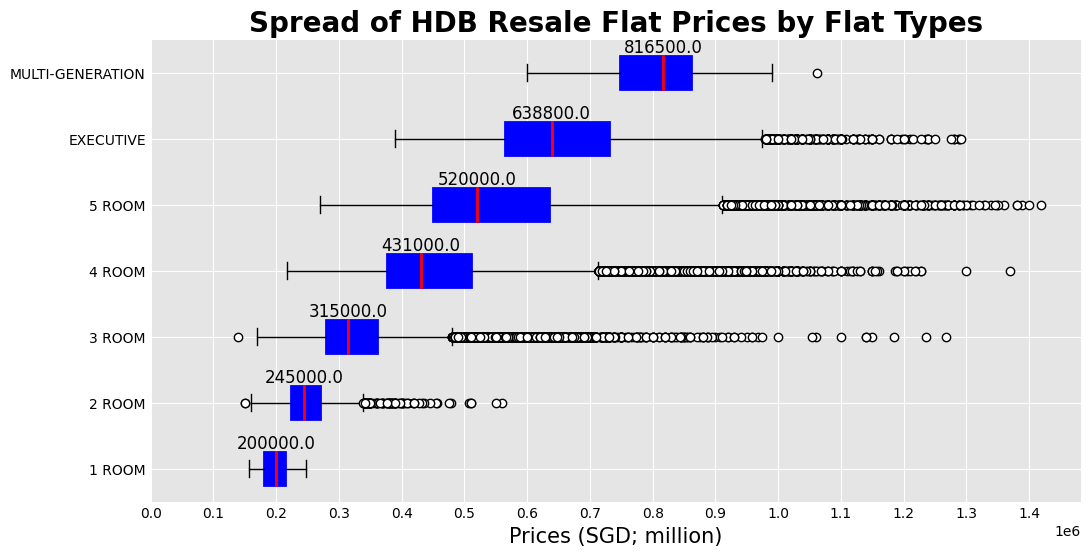

In [273]:
# get unique labels for flat type
labels = list(set(d['flat_type']))
labels.sort()
types = np.arange(0,len(labels))
types_prices = d[['flat_type', 'resale_price']]

# create array for boxplot
prices = types_prices['resale_price']

prices_combined = [prices[types_prices['flat_type'] == i] for i in labels]

# plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

bp_dict = ax.boxplot(prices_combined,
            labels=labels,
            patch_artist=True,
            medianprops={"color": "red", "linewidth": 2},
            boxprops={"facecolor": "blue", "color": "blue",
                          "linewidth": 2},
            flierprops={"markerfacecolor": "white"},
            vert=False)

ax.set_title('Spread of HDB Resale Flat Prices by Flat Types', fontsize=20, fontweight='bold')
ax.set_xlabel('Prices (SGD; million)',fontsize=15)
ax.set_xticks(np.arange(0,1500000,100000))

# remove plot borders
ax.spines[:].set_visible(False) #use open slice to address all spines

# remove axis tick markers
ax.tick_params(length=0)

# add gridlines
ax.grid(color='w')
ax.set_facecolor('#e5e5e5')

for line in bp_dict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, '%.1f' % x,
         verticalalignment='bottom',horizontalalignment='center',fontsize=12) # draw above median line, centered

plt.show()

From the boxplot above, we can see that for resale flat prices in 2015 to present, the larger flat types do see higher median prices than those of smaller types. We can also see that the larger flat types, from 3-room and above, even for some 2-room flats, the resale prices tend to be right-skewed with many outliers in the higher range of prices. 

Considering recent news of HDB resale flat prices increasing, and even hitting SGD 1 million, this could be the reason for the skewness and existence of many outliers. Nevertheless, we can investigate this further by examining the trend of mean HDB resale flat prices across the time period, for each flat type. This will be analysed next.

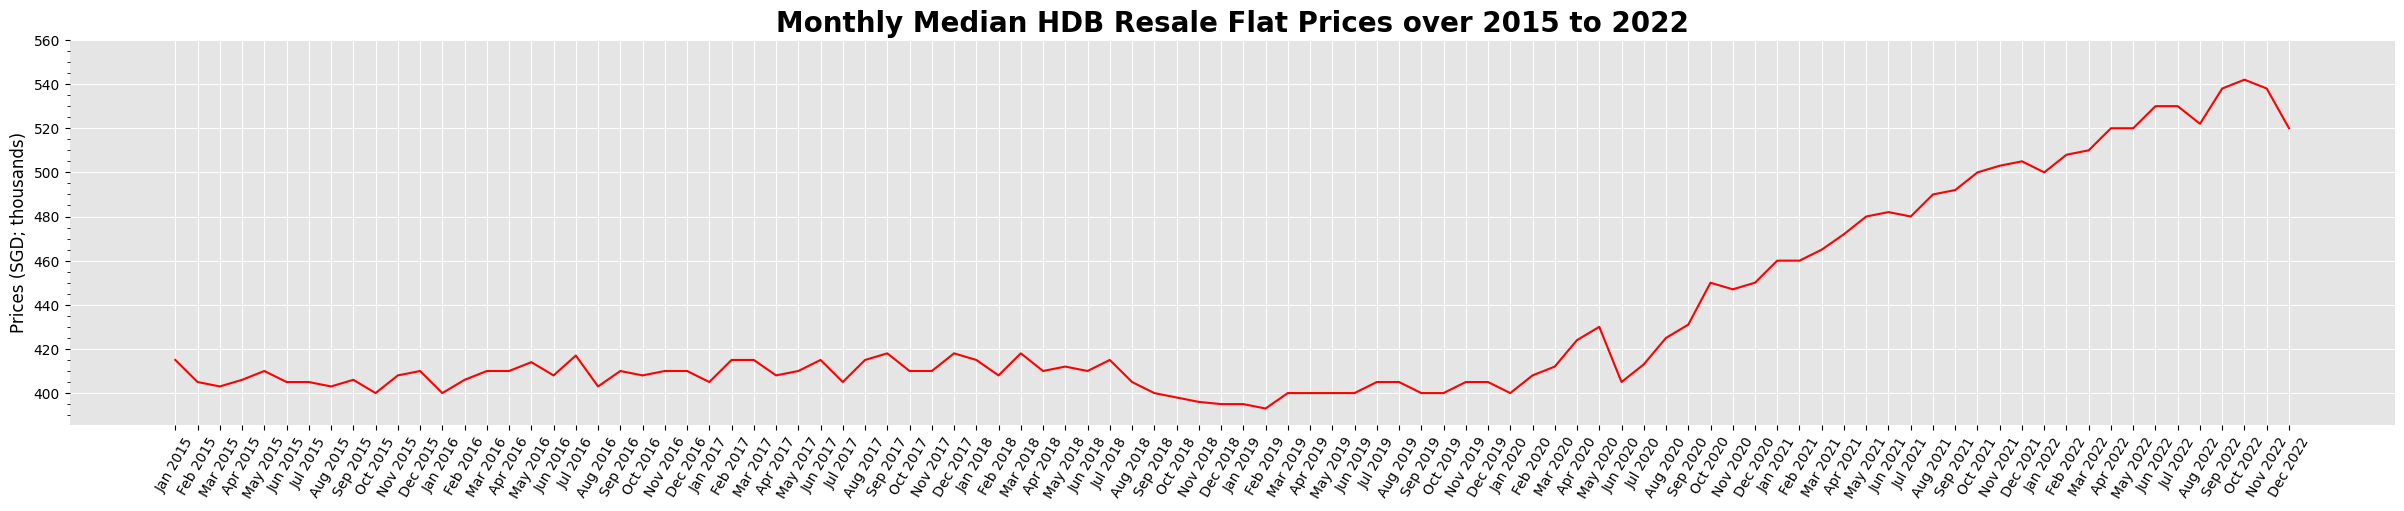

In [33]:
# get unique labels for month and year of sale
labels = list(np.unique(d['month']))
# print(labels)
months = np.arange(0,len(labels))
months_prices = d[['month', 'resale_price']]

# get order of labels based on original array
labels_order = np.unique(d['month'], return_index=True)[1]
labels_ordered = [d['month'][label] for label in sorted(labels_order)]

# create array for line chart of median prices per month from 2015 to 2022
prices = months_prices['resale_price']

prices_median = [np.around(np.median(prices[months_prices['month'] == i])/1000) for i in labels_ordered]

month_prices_median = np.array(list(zip(labels_ordered,prices_median))).reshape((96,2))
# print(month_prices_median)

# plot
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot()

ax.plot(month_prices_median[:,0], month_prices_median[:,1].astype(float), color='red') # prices were saved as str when zipping so need to convert to float
ax.tick_params(axis='x', labelrotation = 60)
ax.set_yticks(np.arange(400,580,20))
ax.yaxis.set_minor_locator(MultipleLocator(5))

# remove plot borders
ax.spines[:].set_visible(False) #use open slice to address all spines

# add gridlines
ax.grid(color='w')
ax.set_facecolor('#e5e5e5')

ax.set_title('Monthly Median HDB Resale Flat Prices over 2015 to 2022',fontsize=20, fontweight='bold')
ax.set_ylabel('Prices (SGD; thousands)', fontsize = 12)

plt.show()

The time series chart shows that HDB resale flat prices have indeed risen over the past few years, with the largest jump occurring from June 2020 onwards, right after the Circuit Breaker period.

    - Note that median was used in the time series chart as the boxplots above showed that the prices data were skewed.

Despite the COVID-19 pandemic causing a recession and inflationary pressures, the increase in resale flat prices can be attributed to increased demand as many individuals or couples sought to get a place of their own after experiencing isolation at home during the Circuit Breaker and ensuing phases introduced by the MMTF in managing the pandemic. This was despite the sharp dip in May 2020, the Circuit Breaker period where most people could not go house-hunting.

Furthermore, the fall in prices seen towards the end of 2021 and 2022 could be attributed to [property cooling measures](https://www.99.co/singapore/insider/new-property-cooling-measures-2022/) introduced by HDB in December 2021 and October 2022 respectively.

However, this visualisation leaves us with 2 questions:

    1. Do the changes in prices correspond with increased volume of transacted resale flats? (i.e., more resale flats exchanging hands)
    2. Are the changes in prices the same across the flat types?

These will be examined next.

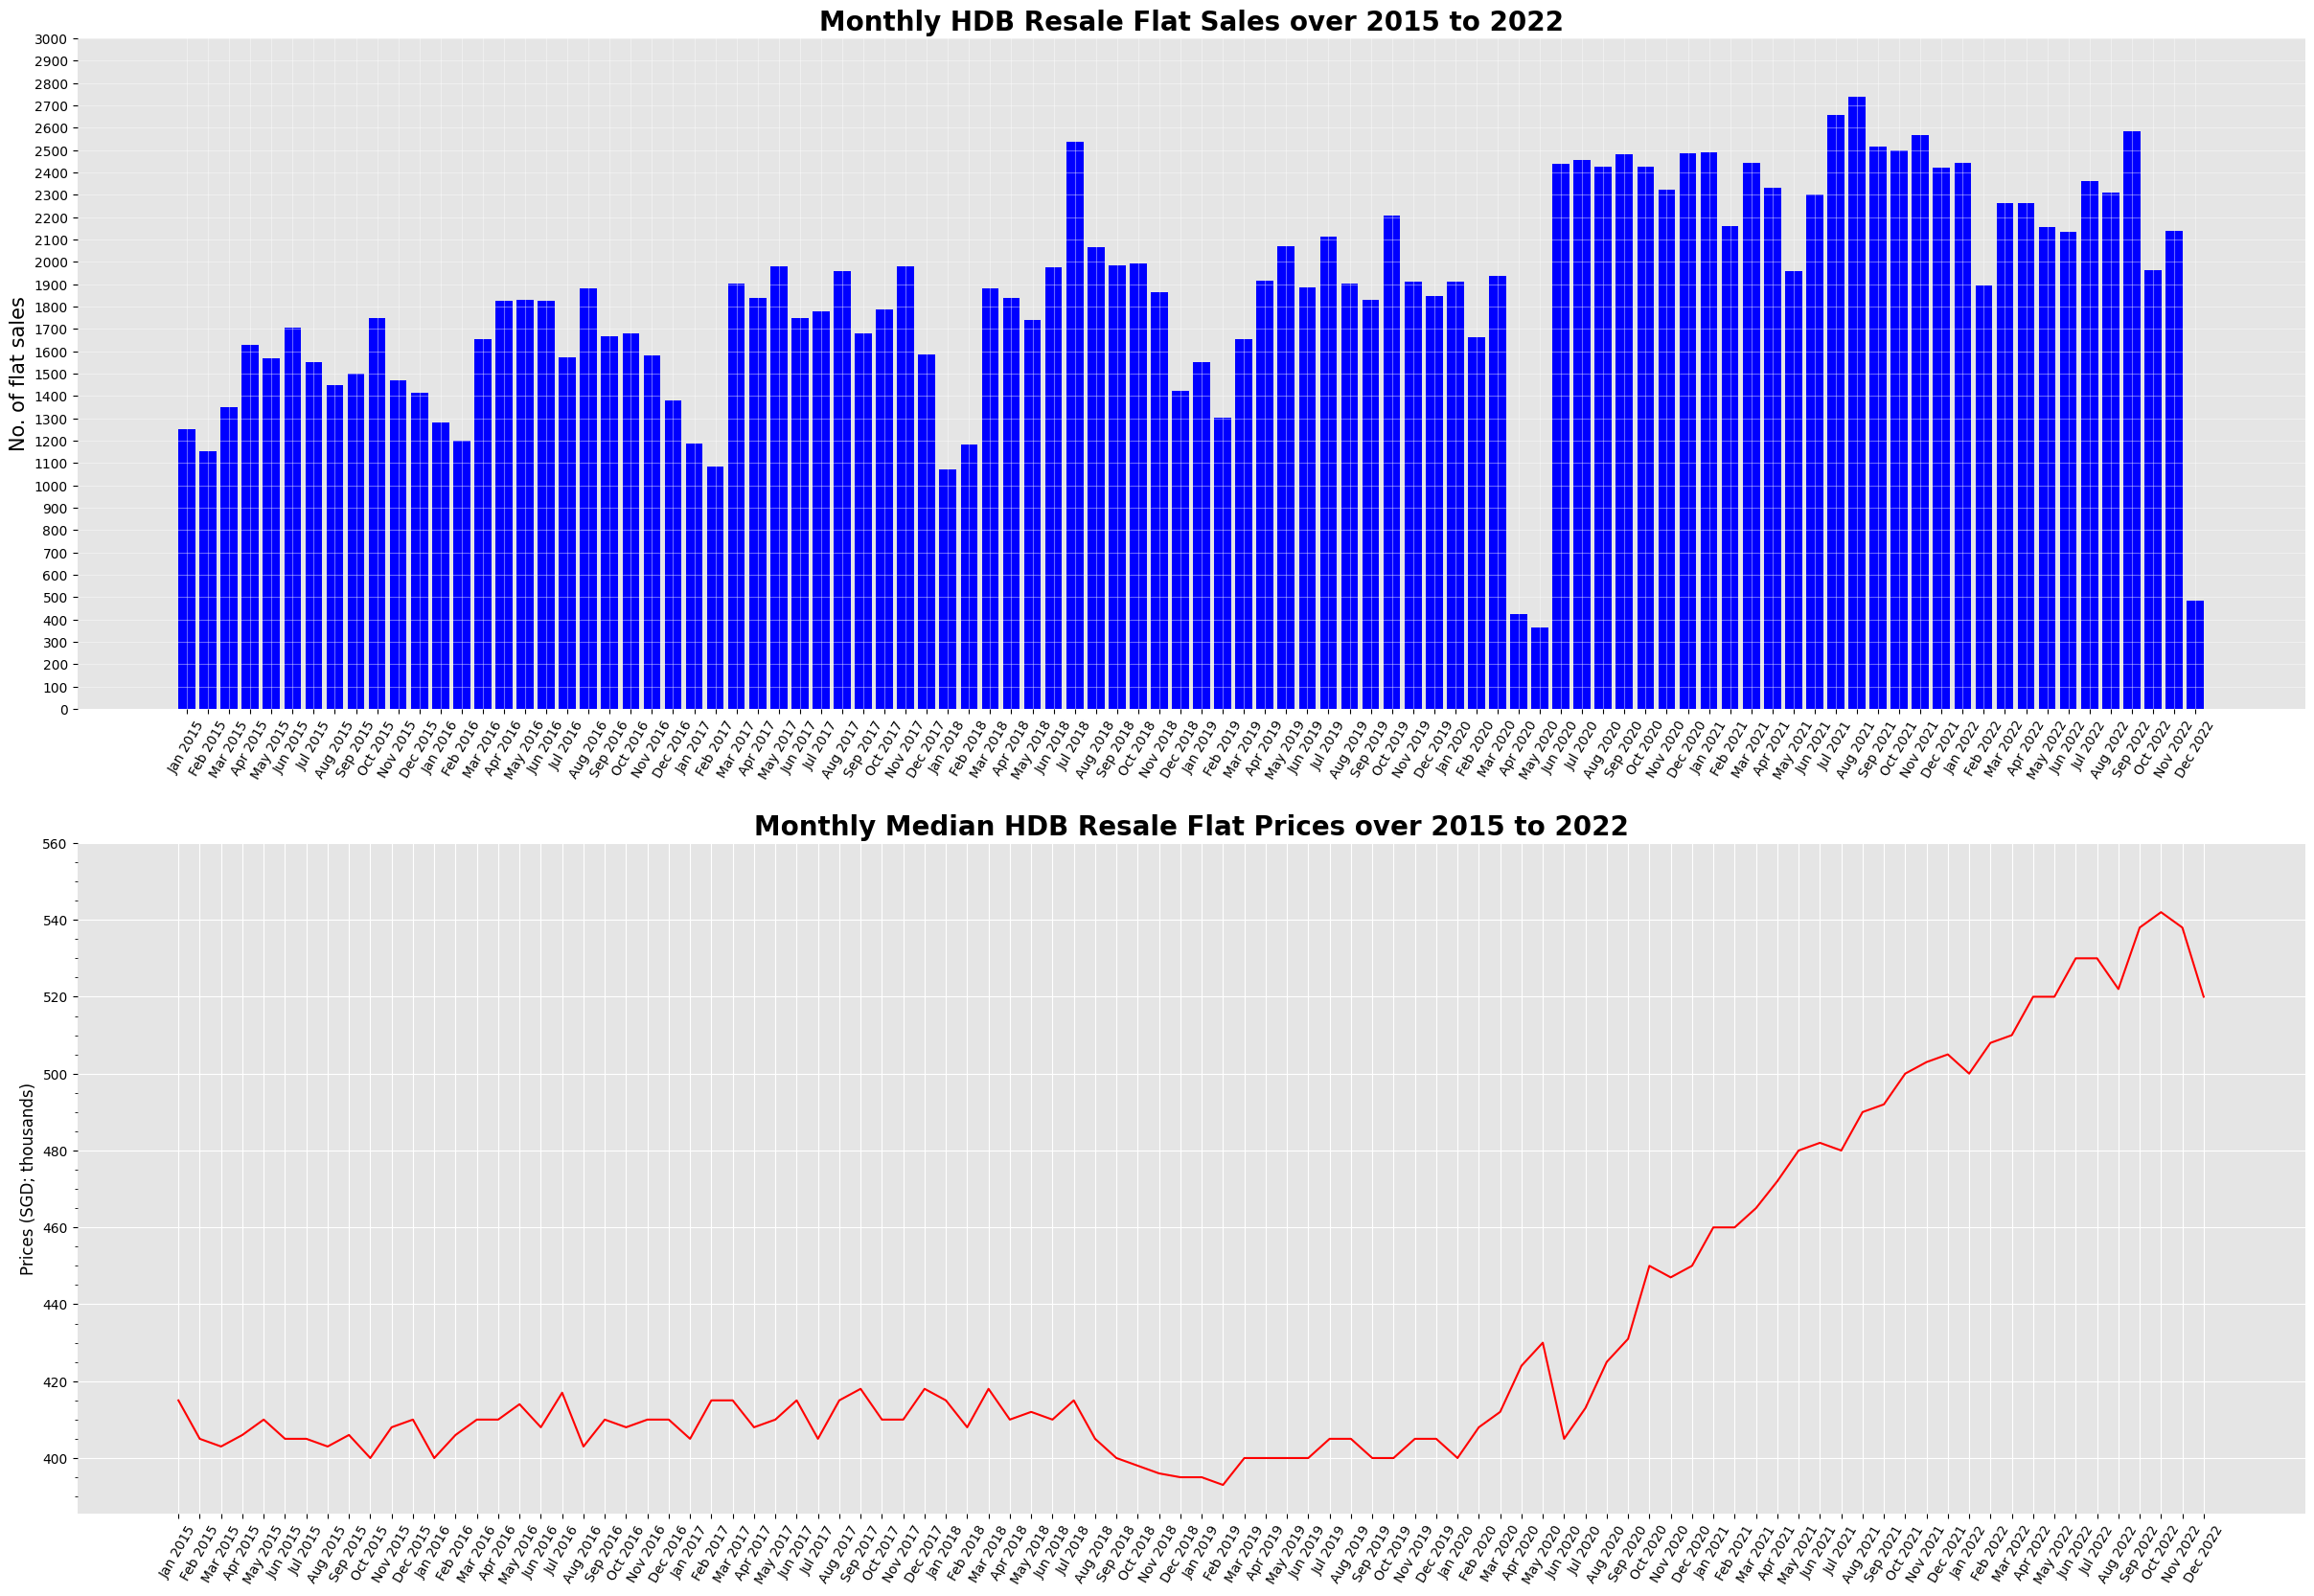

In [4]:
# get unique labels for month and year of sale
labels = list(np.unique(d['month']))
# print(labels)
months = np.arange(0,len(labels))
months_prices = d[['month', 'resale_price']]

# get order of labels based on original array
labels_order = np.unique(d['month'], return_index=True)[1]
labels_ordered = [d['month'][label] for label in sorted(labels_order)]

# create array for bar chart of flat sales per month from 2015 to 2022
prices = months_prices['resale_price']

count_sales = [len(prices[months_prices['month'] == i]) for i in labels_ordered]

month_count_sales = np.array(list(zip(labels_ordered,count_sales))).reshape((96,2))
# print(month_count_sales)

# plot
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(211)

ax1.bar(month_count_sales[:,0], month_count_sales[:,1].astype(int), color='blue') # prices were saved as str when zipping so need to convert to float
ax1.tick_params(axis='x', labelrotation = 60)
ax1.set_yticks(np.arange(0,3100,100))

# remove plot borders
ax1.spines[:].set_visible(False) #use open slice to address all spines

# add gridlines
ax1.grid(color='w', alpha=0.4)
ax1.set_facecolor('#e5e5e5')

ax1.set_title('Monthly HDB Resale Flat Sales over 2015 to 2022',fontsize=20, fontweight='bold')
ax1.set_ylabel('No. of flat sales', fontsize = 15)

# create array for line chart of median prices per month from 2015 to 2022
prices = months_prices['resale_price']

prices_median = [np.around(np.median(prices[months_prices['month'] == i])/1000) for i in labels_ordered]

month_prices_median = np.array(list(zip(labels_ordered,prices_median))).reshape((96,2))
# print(month_prices_median)

# plot
ax2 = fig.add_subplot(212)

ax2.plot(month_prices_median[:,0], month_prices_median[:,1].astype(float), color='red') # prices were saved as str when zipping so need to convert to float
ax2.tick_params(axis='x', labelrotation = 60)
ax2.set_yticks(np.arange(400,580,20))
ax2.yaxis.set_minor_locator(MultipleLocator(5))

# remove plot borders
ax2.spines[:].set_visible(False) #use open slice to address all spines

# add gridlines
ax2.grid(color='w')
ax2.set_facecolor('#e5e5e5')

ax2.set_title('Monthly Median HDB Resale Flat Prices over 2015 to 2022',fontsize=20, fontweight='bold')
ax2.set_ylabel('Prices (SGD; thousands)', fontsize = 12)

plt.show()

1 ROOM AxesSubplot(0.125,0.786098;0.775x0.0939024)
2 ROOM AxesSubplot(0.125,0.673415;0.775x0.0939024)
3 ROOM AxesSubplot(0.125,0.560732;0.775x0.0939024)
4 ROOM AxesSubplot(0.125,0.448049;0.775x0.0939024)
5 ROOM AxesSubplot(0.125,0.335366;0.775x0.0939024)
EXECUTIVE AxesSubplot(0.125,0.222683;0.775x0.0939024)
MULTI-GENERATION AxesSubplot(0.125,0.11;0.775x0.0939024)


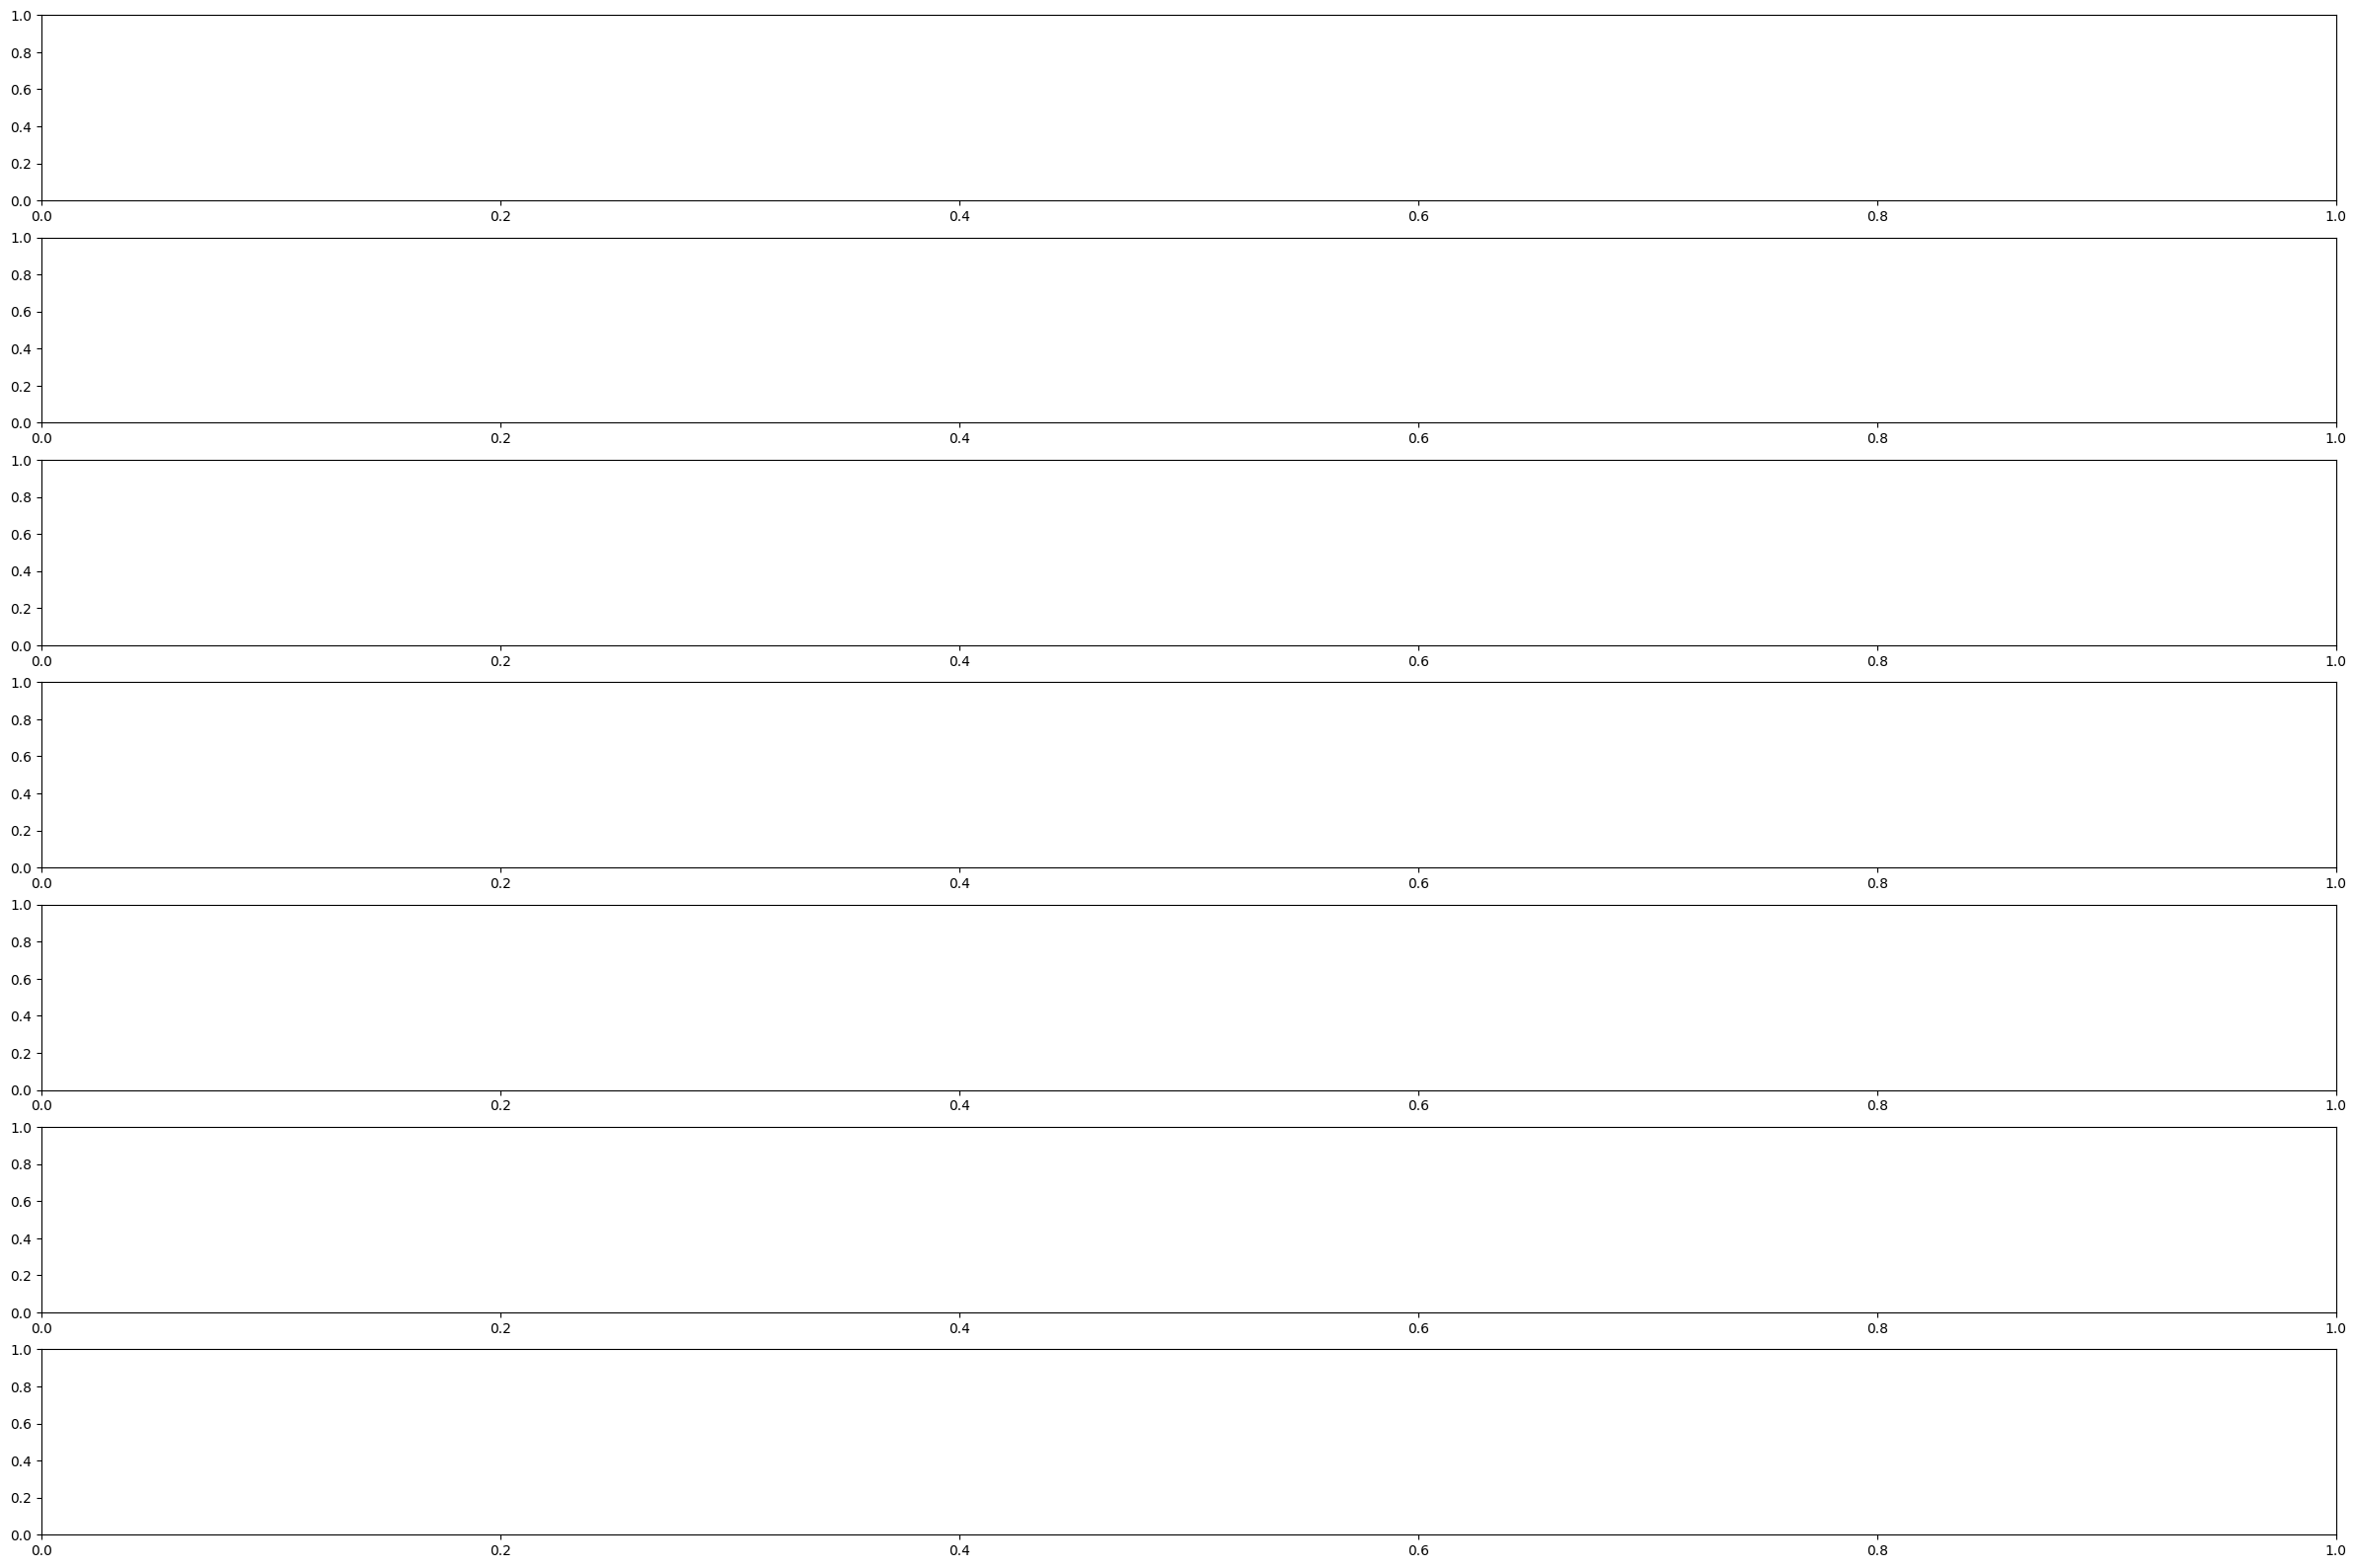

In [4]:
months_prices = d[['month', 'resale_price']]

# function to create sets of arrays for each flat type
def monthPriceFlatType(data,flattype):
    a = data[d['flat_type'] == flattype]
    
    return a

'''
months_type_prices1 = months_prices[d['flat_type'] == '1 ROOM']
months_type_prices2 = months_prices[d['flat_type'] == '2 ROOM']
months_type_prices3 = months_prices[d['flat_type'] == '3 ROOM']
months_type_prices4 = months_prices[d['flat_type'] == '4 ROOM']
months_type_prices5 = months_prices[d['flat_type'] == '5 ROOM']
months_type_prices6 = months_prices[d['flat_type'] == 'EXECUTIVE']
months_type_prices7 = months_prices[d['flat_type'] == 'MULTI-GENERATION']
'''

# function to create pivot table of median values with months for each flattype
def createMedianPivot(data,flattype):
    b = monthPriceFlatType(data,flattype)
    
    # get order of labels based on original array
    # get unique labels for month and year of sale
    labels = list(np.unique(b['month']))
    # print(labels)
    labels_order = np.unique(b['month'], return_index=True)[1]
    labels_ordered = [b['month'][label] for label in sorted(labels_order)]

    # create array for line chart of median prices per month from 2015 to 2022
    prices = b['resale_price']

    prices_median = [np.around(np.median(prices[b['month'] == i])/1000) for i in labels_ordered]

    month_prices_median = np.array(list(zip(labels_ordered,prices_median))).reshape((len(labels_ordered),2))

    return month_prices_median

def subplotnumber(n):
    subplots = []
    try:
        for j in range(1, len(np.unique(d['flat_type']))+1):
            subplots.append(int(f'{j}11'))
    except:
        print("Failed to list subplot numbers")

    return(subplots[n])

def subplotsline(data,flattype,ax):
    c = createMedianPivot(data,flattype)
    months = c[:,0]
    prices = c[:,1]

    try:
        ax.plot(months, prices.astype(float), color='red') # prices were saved as str when zipping so need to convert to float
        ax.tick_params(axis='x', labelrotation = 60)
        ax.set_yticks(np.arange(round(prices.astype(float).min()-100),round(prices.astype(float).min()+100),20))
        ax.yaxis.set_minor_locator(MultipleLocator(5))

        # remove plot borders
        ax.spines[:].set_visible(False) #use open slice to address all spines

        # add gridlines
        ax.grid(color='w')
        ax.set_facecolor('#e5e5e5')

        ax.set_title('Monthly Median HDB Resale Flat Prices over 2015 to 2022',fontsize=20, fontweight='bold')
        ax.set_ylabel('Prices (SGD; thousands)', fontsize = 12)
    
    except:
        print("Failed to create subplots")

fig, axes = plt.subplots(7,1,figsize=(30,20))
axes = axes.flatten()

# https://stackoverflow.com/questions/68720116/creating-subplots-with-a-function-and-loop

axes_type = np.array(list(zip(np.unique(d['flat_type']),axes)))

# for type, ax in axes_type:
#     print(createMedianPivot(months_prices,'2 ROOM'))
# plt.show()



In [10]:
# %reset